In [3]:
''' 
================================================================================================================================

Milestone 1


Nama: Rizqia Dewi Annisa

Batch: Hck-010


Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.

=================================================================================================================================
'''

' \n================================================================================================================================\n\nMilestone 1\n\n\nNama: Rizqia Dewi Annisa\n\nBatch: Hck-010\n\n\nMilestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.\n\n=================================================================================================================================\n'

# **CASE STUDY - Netflix Userbase**

Saat ini netflix ingin meningkatkan loyalitas pelanggan dengan melakukan campaign, namun karena tidak mengetahui pola atau perilaku user existing, sehingga netflix mencari pakar data analyst. Kemudian netflix meminta bantuan untuk mengidentifikasi segala perilaku user dalam penggunaan platform netflix, yang nanti akan digunakan untuk melakukan campaign strategist, sehingga meningkatkan revenue bagi perusahaan netflix.





##  **Business Understanding**

### - ***Defining the Problem Statements***

**Specific**: Meningkatkan loyalitas/ subscription pelanggan.

**Measurable**: Mencapai revenue lebih dari 85%.

**Achievable**: Meningkatkan kulitas produk dengan mengoptimalisasi poduk, layanan, subscription dan promosi.

**Relevant**: Menigkatkan loyalitas pelanggan dapat menghasilkan revenue yang lebih tinggi.

**Time-Bound**: Dalam 1 quartal kedepan.



*Problem Statement* : Meningkatkan loyalitas pelanggan yang ada dengan tingkat subcription pelanggan saat ini dapat dicapai dengan mengoptimalisasi layanan/subription, dan promosi, sehingga mendorong revenue yang lebih dari 85% dalam 1 quartal kedepan.


### - ***Breaking Down the Problem***

*Main Problem*: Optimalisasi campign untuk meningkatkan revenue netflix


*The 5W+1Hs*:
1. Siapa saja pengguna netlfix terbanyak?
2. Jenis/ tipe subcription apa saja yang paling banyak dipilih user?
3. Berapa rata-rata pengguna netflix yang aktif di seluruh dunia?
4. Mengapa meningkatkan jumlah subription penting bagi perusahaan?
5. Berapa tingkat churn rate netflix?
6. Berapa banyak pendapatan/revenue yang didapatkan netflix dari pengguna?

##  **Data Understanding**

### - ***Basic Data Information***


- User ID : sebagai indentitas unik setiap pelanggan

- Subscriptio  Type : tipe member yang dipilih setiap pelanggan

- Monthly Revenue : pemasukan bulanan berdasarkan dari tipe subscription setiap pelanggan

- Join Date : tanggal pertama kali pelanggan bergabung untuk berlangganan

- Last Payment Date : tanggal terakhir pelanggan melakukan pembayaran/perpanjangan masa berlangganan

- Country : negara dimana pelanggan berasal

- Age : usia setiap pelanggan

- Gender : jenis kelamin pelanggan

- Device : perangkat elektronik yang digunakan pelanggan dalam menggunakan netflix

- Plan Duration : jangka waktu pelanggan memilih untuk berlangganan

In [116]:
# Setup pandas, scipy, matplotlib, seaborn, dan numpy
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [117]:
# Menampilkan data
df = pd.read_csv("Netflix Userbase.csv")

df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


**Insight** : data yang ditampilkan berupa userId, Subscription Type, Monthly Revenue, Join Date, Last Payment Date, Country, Age, Gender, Device, dan Plan Duration

In [18]:
# mengetahui informasi berupa ringkasan pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


**Insight** : terdapat 10 column diantara memiliki tipe data int64 3 column dan object 7 column, dengan semua jumlah data sama yaitu sebanyak 2500 serta tidak memiliki data yang kosong.

In [4]:
# mengecek jumlah data kosong pada setiap kolom
df.isnull().sum()

User ID               0
TipeBerlangganan      0
PendapatanBulanan     0
Bergabung             0
PembayaranTerakhir    0
Country               0
Age                   0
Gender                0
Device                0
Durasi                0
Aktif                 0
ChurnRate             0
dtype: int64

In [78]:
# data duplikat
print(f'data duplikat: {df.duplicated().sum()}')

# menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'data setalah dihapus duplikat:{len(df)}')

data duplikat: 0
data setalah dihapus duplikat:2500


In [118]:
# Mengganti nama kolom dan tipe data
listed = {
    'User Id':'Id',
    'Subscription Type':'TipeBerlangganan',
    'Monthly Revenue':'PendapatanBulanan',
    'Join Date':'Bergabung',
    'Last Payment Date':'PembayaranTerakhir',
    'Plan Duration' : 'Durasi'
    }

df.rename(columns=listed,inplace=True)

df['PembayaranTerakhir'] = pd.to_datetime(df['PembayaranTerakhir'])
df['Bergabung'] = pd.to_datetime(df['Bergabung'])


In [40]:
# Memastikan data
df

,User ID,TipeBerlangganan,PendapatanBulanan,Bergabung,PembayaranTerakhir,Country,Age,Gender,Device,Durasi
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


In [119]:
df1 = df.copy()
df1.drop(['Durasi'],axis=1,inplace=True)
df1

,User ID,TipeBerlangganan,PendapatanBulanan,Bergabung,PembayaranTerakhir,Country,Age,Gender,Device
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   User ID             2500 non-null   int64         
 1   TipeBerlangganan    2500 non-null   object        
 2   PendapatanBulanan   2500 non-null   int64         
 3   Bergabung           2500 non-null   datetime64[ns]
 4   PembayaranTerakhir  2500 non-null   datetime64[ns]
 5   Country             2500 non-null   object        
 6   Age                 2500 non-null   int64         
 7   Gender              2500 non-null   object        
 8   Device              2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


In [67]:
# Mengetahui banyak data unik
df1.nunique()

User ID               2500
TipeBerlangganan         3
PendapatanBulanan        6
Bergabung              300
PembayaranTerakhir      26
Country                 10
Age                     26
Gender                   2
Device                   4
dtype: int64

In [68]:
# melihat nilai statistik dalam data
df1.describe()

,User ID,PendapatanBulanan,Bergabung,PembayaranTerakhir,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,1.00000,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,625.75000,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,2500.00000,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


##  **Data Preparation**

### - ***Penambahan Data Lama Berlangganan***

In [120]:
df1['LamaBerlangganan'] = ((df1['PembayaranTerakhir'] - df1['Bergabung']).dt.days)//30
df1

,User ID,TipeBerlangganan,PendapatanBulanan,Bergabung,PembayaranTerakhir,Country,Age,Gender,Device,LamaBerlangganan
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,5
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,16
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,15
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,10
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,12


### - ***Penambahan Data ChrunRate***

In [121]:
df1['ChurnRate'] = 1 - df1['LamaBerlangganan'] / df1['LamaBerlangganan'].max()
df1

,User ID,TipeBerlangganan,PendapatanBulanan,Bergabung,PembayaranTerakhir,Country,Age,Gender,Device,LamaBerlangganan,ChurnRate
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,20,0.20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,25,0.00
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,3,0.88
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,8,0.68
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,5,0.80
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,16,0.36
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,15,0.40
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,10,0.60
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,12,0.52


### - ***Missing Values Handling***

In [72]:
# mengecek jumlah data kosong pada setiap kolom
df1.isnull().sum()

User ID               0
TipeBerlangganan      0
PendapatanBulanan     0
Bergabung             0
PembayaranTerakhir    0
Country               0
Age                   0
Gender                0
Device                0
LamaBerlangganan      0
ChurnRate             0
dtype: int64

In [77]:
# data duplikat
print(f'data duplikat: {df1.duplicated().sum()}')

# menghapus data duplikat
df1.drop_duplicates(inplace=True)
print(f'data setalah dihapus duplikat:{len(df)}')

data duplikat: 0
data setalah dihapus duplikat:2500


In [73]:
# Menganti type data pada kolom Bergabung dan Pembayaran Terakhir
df1['Bergabung']: df1['Bergabung'].astype('datetime64[ns]')
df1['PembayaranTerakhir']: df1['PembayaranTerakhir'].astype('datetime64[ns]')


In [74]:
# Mengecek kembali data sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   User ID             2500 non-null   int64         
 1   TipeBerlangganan    2500 non-null   object        
 2   PendapatanBulanan   2500 non-null   int64         
 3   Bergabung           2500 non-null   datetime64[ns]
 4   PembayaranTerakhir  2500 non-null   datetime64[ns]
 5   Country             2500 non-null   object        
 6   Age                 2500 non-null   int64         
 7   Gender              2500 non-null   object        
 8   Device              2500 non-null   object        
 9   Durasi              2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


**Insight** : data pada kolom Bergabung dan PembayaranTerakhir sudah diubah tipe datanya sesuai ketentuan tanggal

## **Modeling/Exploratory Data Analysis**

### Berapa rata-rata pengguna netflix yang aktif di seluruh dunia?

In [113]:
meanNetflix = df1.groupby('Country')['LamaBerlangganan'].mean().reset_index(name='rata-rata')
meanNetflix

,Country,rata-rata
0,Australia,10.704918
1,Brazil,10.513661
2,Canada,10.328076
3,France,10.644809
4,Germany,10.393443
5,Italy,9.972678
6,Mexico,10.524590
7,Spain,10.223947
8,United Kingdom,10.737705
9,United States,10.365854


**Insight**: United Kingdom memiliki rata-rata pengguna terbesar dan Italy memiliki rata-rata pengguna terendah

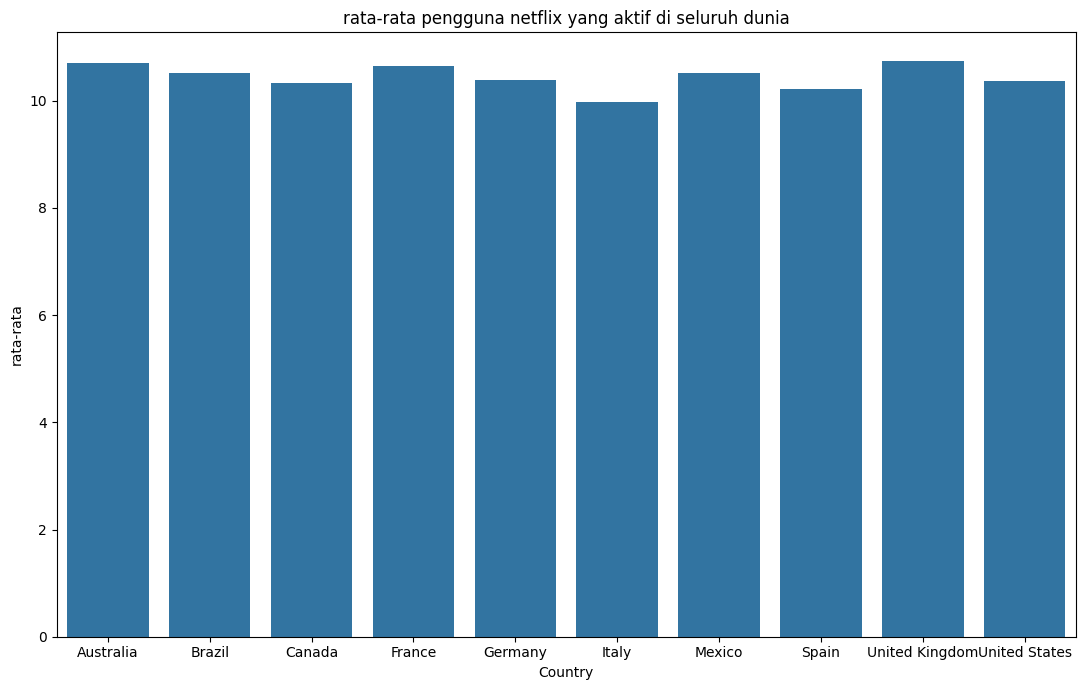

In [62]:
meanNetflix = df1.groupby('Country')['LamaBerlangganan'].mean().reset_index(name='rata-rata')

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.barplot(x='Country', y='rata-rata',data=meanNetflix)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('Country')
plt.ylabel('rata-rata')
plt.title('rata-rata pengguna netflix yang aktif di seluruh dunia')

#Mengatur Legenda
plt.tight_layout()
plt.show()

### Mengapa meningkatkan jumlah subscription penting bagi perusahaan?

Hipotesis:

*H0* : Meningkatkan jumlah subscription tidak berpengaruh nyata terhadap peningkatan revenue

*H1* : Meningkatkan jumlah subscription dapat meningkatkan revenue

In [76]:
crosstab = pd.crosstab(df1['PendapatanBulanan'] * df1['LamaBerlangganan'],df1['TipeBerlangganan'])
stats.chi2_contingency(crosstab).pvalue

0.1638101685540687

Insight: dengan pvalue diatas 0.05, maka jumlah subscription tidak berpengaruh nyata terhadap peningkatan revenue

### Siapa saja pengguna netflix yang memakai Smart TV?

In [16]:
# SetUp plotly.express
import matplotlib.pyplot as plt
import seaborn as sns

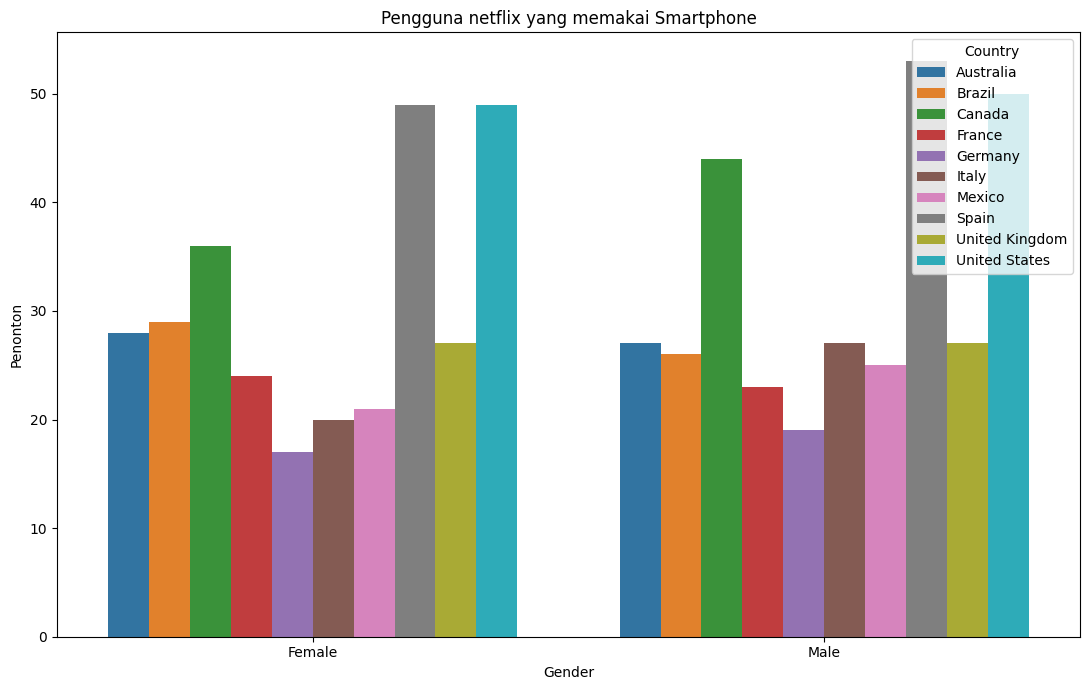

In [105]:
# Mengambil data yang diperlukan
netflix = df1[df1['Device']=='Smartphone'].groupby(['Gender', 'Country'])['Country'].count().reset_index(name='Penonton')

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.barplot(x='Gender', y='Penonton', hue='Country',data=netflix)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('Gender')
plt.ylabel('Penonton')
plt.title('Pengguna netflix yang memakai Smartphone')

#Mengatur Legenda
plt.legend(title="Country",loc='upper right')

plt.tight_layout()
plt.show()

Insight: Pengguna netflix yang memakai Smart TV terdiri dari pria dan wanita dari berbagai negara dengan pengguna spanyol memiliki pengguna yang lebih banyak

### Jenis/ tipe subscription apa saja yang biasa user pilih?

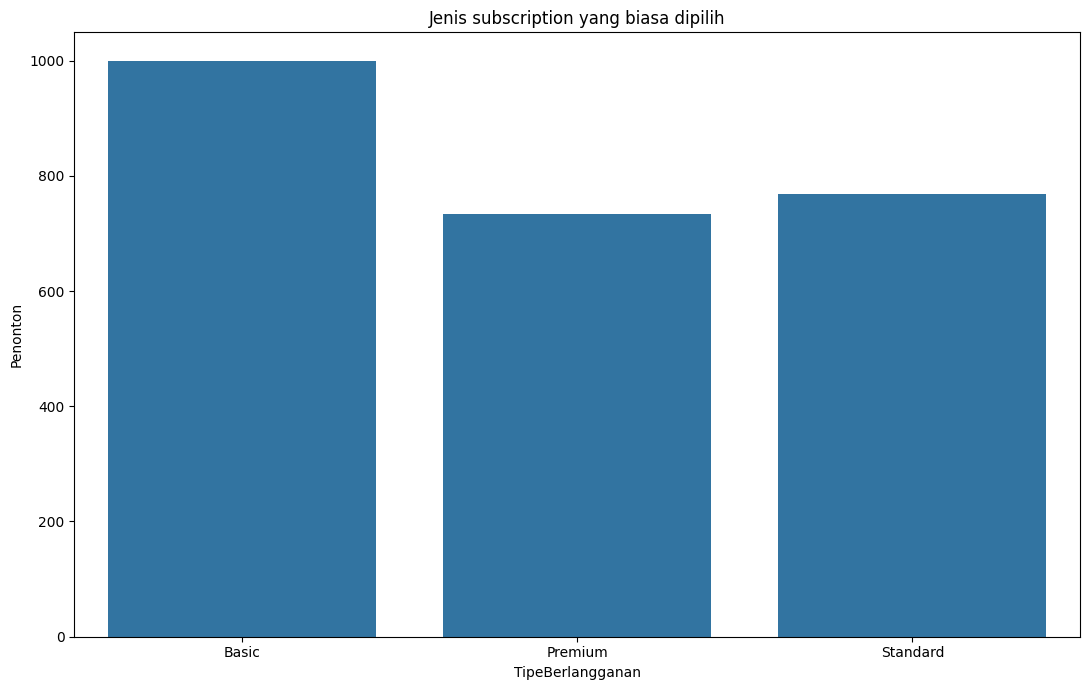

In [86]:
# Mengambil data yang diperlukan
subscribe = df1.groupby(['TipeBerlangganan'])['User ID'].count().reset_index(name='Penonton')

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.barplot(x='TipeBerlangganan', y='Penonton',data=subscribe)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('TipeBerlangganan')
plt.ylabel('Penonton')
plt.title('Jenis subscription yang biasa dipilih')

plt.tight_layout()
plt.show()

Insight: Basic adalah subscription type yang biasa dipilih orang di manca negara

In [104]:
device_counts = df['Device'].value_counts()
px.pie(device_counts, names=device_counts.index, values=device_counts.values, title='Device Distribution', color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
              'hovertemplate': 'Device=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Laptop', 'Tablet', 'Smartphone', 'Smart TV'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([636, 633, 621, 610], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(103,0,31), rgb(178,24,43), rgb(214,96,77),
                               rgb(244,165,130), rgb(253,219,199),
                               rgb(247,247,247), rgb(209,229,240),
                               rgb(146,197,222), rgb(67,147,195), rgb(33,102,172),
                               rgb(5,48,97)],
               'template': '...',
               'title': {'text': 'Device Distribution'}}
})

In [103]:
sub_cnts = df1['TipeBerlangganan'].value_counts()
px.pie(sub_cnts, names=sub_cnts.index, values=sub_cnts.values, title='Distribution of Subscription Types', color_discrete_sequence=px.colors.sequential.Jet, hole = 0.5)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.5,
              'hovertemplate': 'TipeBerlangganan=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Basic', 'Standard', 'Premium'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([999, 768, 733], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(0,0,131), rgb(0,60,170), rgb(5,255,255),
                               rgb(255,255,0), rgb(250,0,0), rgb(128,0,0)],
               'template': '...',
               'title': {'text': 'Distribution of Subscription Types'}}
})

### Berapa tingkat churn rate netflix?

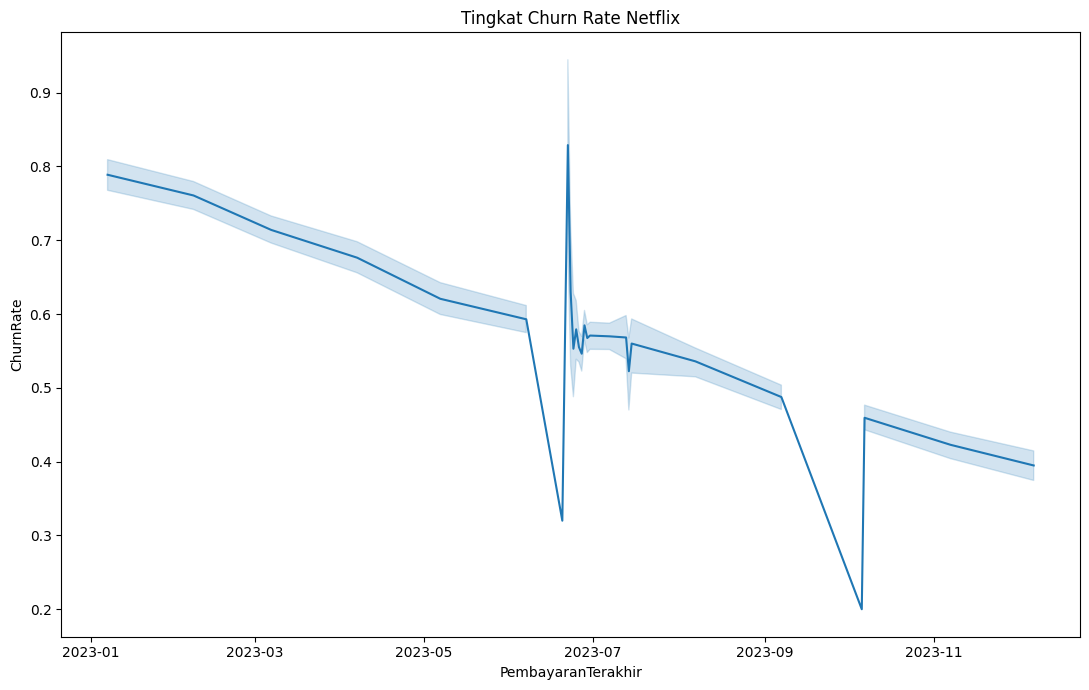

In [91]:
# Mengambil data yang diperlukan
subscribe = df1[['PembayaranTerakhir','ChurnRate']]

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.lineplot(x='PembayaranTerakhir', y='ChurnRate',data=subscribe)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('PembayaranTerakhir')
plt.ylabel('ChurnRate')
plt.title('Tingkat Churn Rate Netflix')

plt.tight_layout()
plt.show()

Insight: Netflix memiliki tingkat Churn Rate tertinggi di sekitar 2023-06-21 dan mengalami penurunan pada bulan Oktober 2023

### Berapa banyak pendapatan/revenue yang didapatkan netflix dari pengguna?

In [88]:
#Mendapat pendapatan bulanan
pendapatan = df1['PendapatanBulanan'].sum()
print(f'pendapatan: {pendapatan}')

pendapatan: 31271


**Insight**: Pendapatan bulanan netflix adalah sebesar 31271 apabila semua user aktif

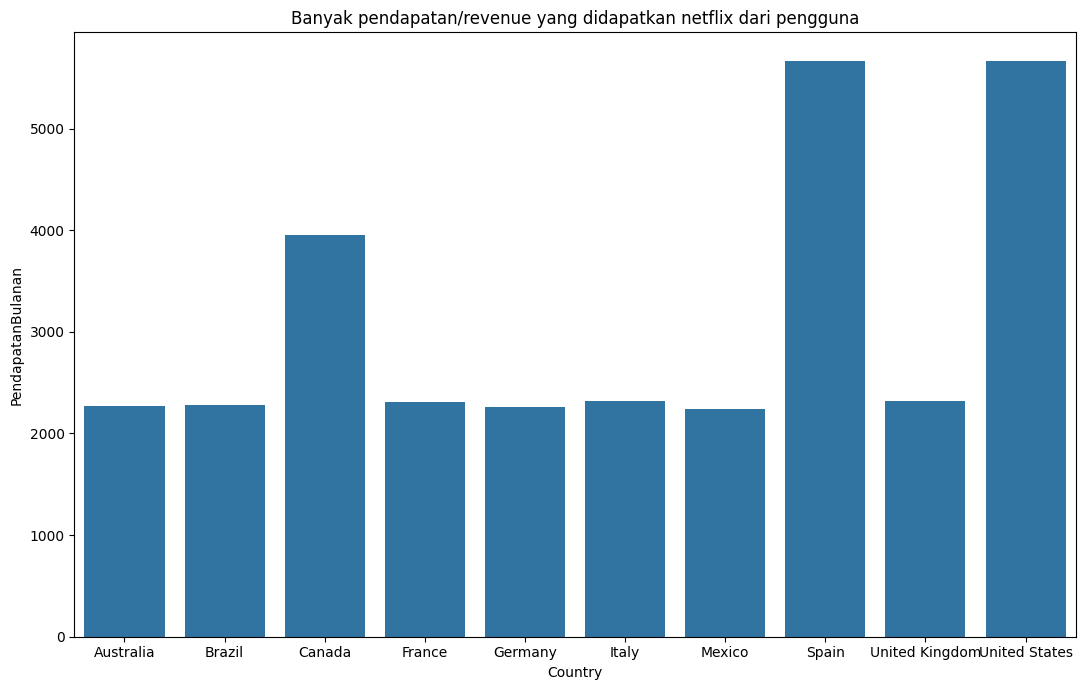

In [81]:
revenue = df.groupby('Country')['PendapatanBulanan'].sum().reset_index(name='PendapatanBulanan')

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.barplot(x='Country', y='PendapatanBulanan',data=revenue)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('Country')
plt.ylabel('PendapatanBulanan')
plt.title('Banyak pendapatan/revenue yang didapatkan netflix dari pengguna')

plt.tight_layout()
plt.show()

Insight: Total pendapatan netflix adalah 31271 dengan Spanyol dan Amerika sebagai konsumen netflix tertinggi

In [126]:
revenue4 = df1[(df1['Bergabung'].dt.year == 2021) & (df1['Bergabung'].dt.month == 4)].groupby('Country')['PendapatanBulanan'].dt.year == 2021.sum().reset_index(name='PendapatanBulanan')

# membuat plot
plt.figure(figsize=(11,7))

#membuat graphis
sns.barplot(x='Country','PendapatanBulanan', y='Bergabung',data=revenue4)

#Membuat Judul dan Label untuk X dan Y
plt.xlabel('Country')
plt.ylabel('PendapatanBulanan')
plt.title('Banyak pendapatan/revenue yang didapatkan netflix dari pengguna')

plt.tight_layout()
plt.show()

SyntaxError: invalid decimal literal (2960391434.py, line 1)

In [108]:
px.choropleth(df, locations="Country", locationmode="country names", color="Monthly Revenue", title="Choropleth Map of Monthly Revenue by Country")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': 'Country=%{location}<br>Monthly Revenue=%{z}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['United States', 'Canada', 'United Kingdom', ..., 'United States',
                                  'Canada', 'United States'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': array([10, 15, 12, ..., 12, 13, 15], dtype=int64)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Monthly Revenue'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Choropleth Map of Monthly Revenue by Country'}}
})

In [24]:
df.to_csv('Netflix.csv',index=False)

## **Conclusion**

Dari data dapat disimpulkan bahwa:
- Negara United Kingdom dan Australia memiliki rata-rata terbesar pengguna netflix
- Total pendapatan perbulan netflix apabila semua penggunanya aktif adalah 31271 dengan Negara Spanyol dan Amerika sebagai jumlah konsumen netflix tertinggi
- Netflix memiliki tingkat Churn Rate tertinggi di sekitar bulan Oktober 2023
- Basic adalah Tipe Berlangganan yang paling banyak dipilih pengguna netflix
- Pengguna netflix yang memakai Smartphone terdiri dari pria dan wanita dari berbagai negara dengan pengguna spanyol memiliki pengguna yang lebih banyak diikuti Australia
- dengan pvalue diatas 0.05, maka jumlah subscription tidak berpengaruh nyata terhadap peningkatan revenue

## **TABLEAU**

https://public.tableau.com/app/profile/rizqia.dewi.annisa/viz/Milestone1-Chiqa-NetflixUserbase/Dashboard1?publish=yes